# Convolution of damped oscillation and instrumental response function

1. Compare numerical implementation and analytic one
2. Determine irf depending detection limits for period of oscillation with S/N = 10

For pseudo voigt profile ${fwhm}({fwhm}_G, {fwhm}_L)$ and $\eta({fwhm}_G, {fwhm}_L)$ is chosen according to
 [J. Appl. Cryst. (2000). **33**, 1311-1316](https://doi.org/10.1107/S0021889800010219)

In [1]:
# import needed module
import numpy as np
from scipy.signal import convolve
import matplotlib.pyplot as plt
import TRXASprefitpack
from TRXASprefitpack import gau_irf, cauchy_irf, voigt
from TRXASprefitpack import calc_eta, calc_fwhm
from TRXASprefitpack import dmp_osc_conv_gau, dmp_osc_conv_cauchy, dmp_osc_conv_pvoigt
plt.rcParams["figure.figsize"] = (12,9)

In [2]:
# Define damped oscillation
def dmp_osc(t, k, T, phase):
    return np.heaviside(t, 1)*np.exp(-k*t)*np.cos(2*np.pi/T*t+phase)

## Numerical implementation vs. Analytic implementation

for voigt instrumental response function, analytic implementation is based on pseudo voigt approximation

In [3]:
# Set damped oscillation paramter
tau = 1; period = 0.3; phase = np.pi/4
t = np.linspace(-5, 5, 3000)
t_sample = np.hstack((np.arange(-1, 1, 0.05), np.linspace(1, 5, 8)))
dmp_osc_num = dmp_osc(t, 1/tau, period, phase)

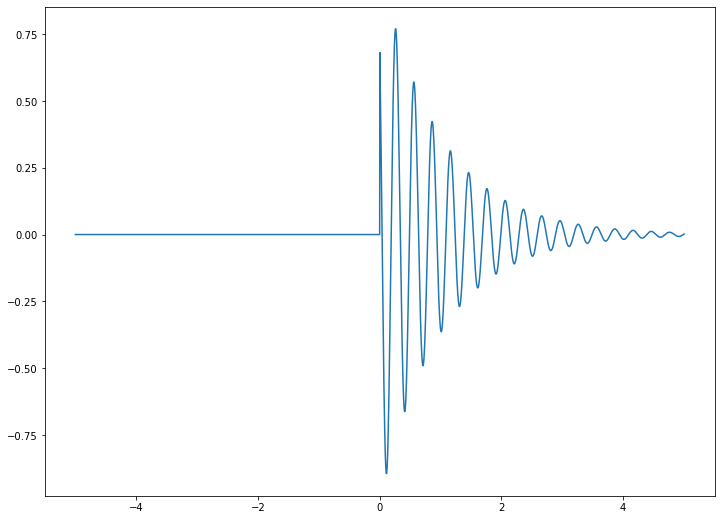

In [4]:
plt.plot(t, dmp_osc_num)
plt.show()

### Gaussian IRF

In [5]:
# Set fwhm paramter for gaussian irf
fwhm_G = 0.15
gau_irf_num = gau_irf(t, fwhm_G)

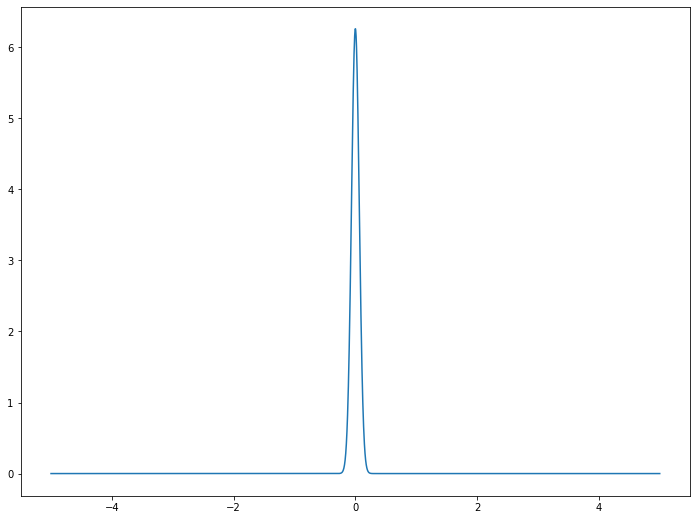

In [6]:
plt.plot(t, gau_irf_num)
plt.show()

In [7]:
# Now calculates convolution

dmp_osc_conv_gau_num = convolve(gau_irf_num, dmp_osc_num, 'same')*(t[1]-t[0]) # Numerical
dmp_osc_conv_gau_anal = dmp_osc_conv_gau(t_sample, fwhm_G, 1/tau, period, phase) # analytic

In [8]:
%timeit convolve(gau_irf_num, dmp_osc_conv_gau_num, 'same')

206 µs ± 259 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%timeit dmp_osc_conv_gau(t_sample, fwhm_G, 1/tau, period, phase)

45.4 µs ± 191 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Trivally, calculation of analytic one takes much less time than numerical one.

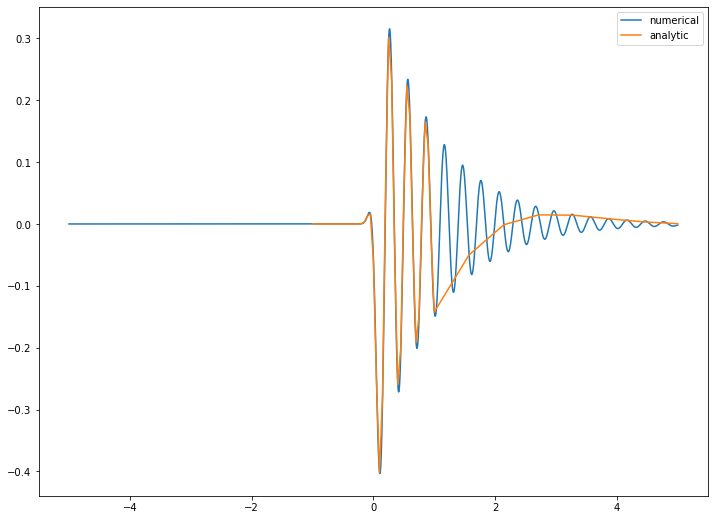

In [10]:
# Compare two implementation
plt.plot(t, dmp_osc_conv_gau_num, label='numerical')
plt.plot(t_sample, dmp_osc_conv_gau_anal, label='analytic')
plt.legend()
plt.show()

### Cauchy IRF

In [11]:
# Set fwhm paramter for cauchy irf
fwhm_L = 0.10
cauchy_irf_num = cauchy_irf(t, fwhm_L)

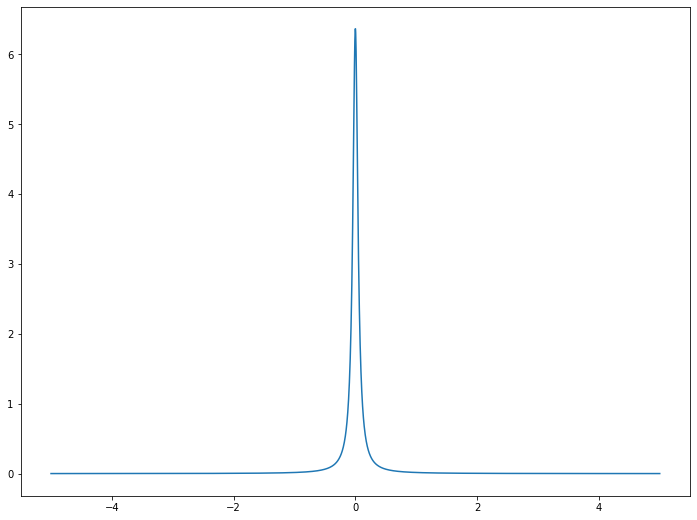

In [12]:
plt.plot(t, cauchy_irf_num)
plt.show()

In [13]:
# Now calculates convolution

dmp_osc_conv_cauchy_num = convolve(cauchy_irf_num, dmp_osc_num, 'same')*(t[1]-t[0]) # Numerical
dmp_osc_conv_cauchy_anal = dmp_osc_conv_cauchy(t_sample, fwhm_L, 1/tau, period, phase) # analytic

In [14]:
%timeit convolve(cauchy_irf_num, dmp_osc_num, 'same')

223 µs ± 496 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%timeit dmp_osc_conv_cauchy(t_sample, fwhm_L, 1/tau, period, phase)

209 µs ± 406 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Analytic calculation of convolution of damped osciliation and cauchy instrumental response function needs more time than numerical one. And about four times slower than gaussian one.

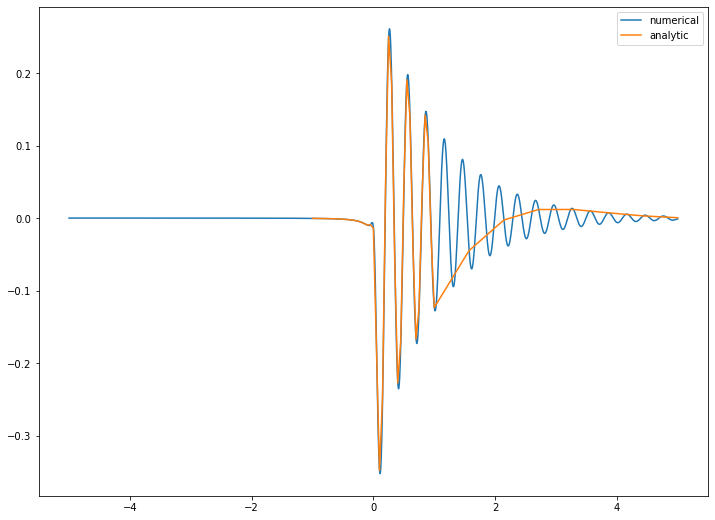

In [16]:
# Compare two implementation

plt.plot(t, dmp_osc_conv_cauchy_num, label='numerical')
plt.plot(t_sample, dmp_osc_conv_cauchy_anal, label='analytic')
plt.legend()
plt.show()

### Voigt IRF

In [17]:
# Set fwhm paramter for voigt IRF
fwhm_G = 0.10; fwhm_L = 0.05
fwhm = calc_fwhm(fwhm_G, fwhm_L)
eta = calc_eta(fwhm_G, fwhm_L)
voigt_irf_num = voigt(t, fwhm_G, fwhm_L)

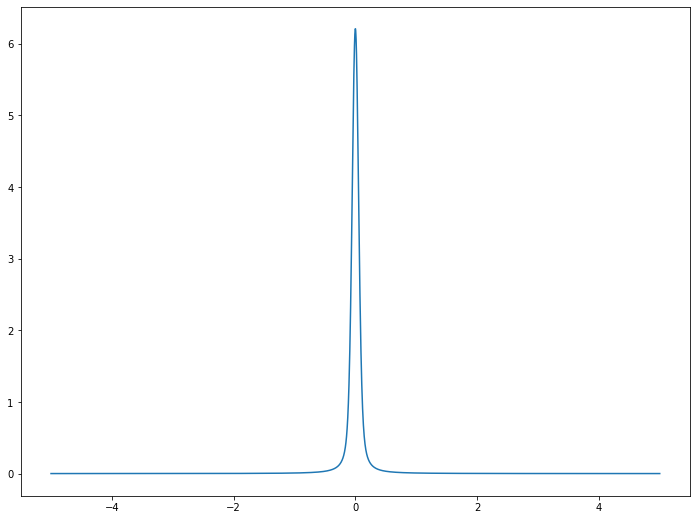

In [18]:
plt.plot(t, voigt_irf_num)
plt.show()

Voigt function is much complex than gaussian and cauchy function, so it takes much more time to compute.

In [19]:
%timeit gau_irf(t, fwhm_G)

40.8 µs ± 353 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [20]:
%timeit cauchy_irf(t, fwhm_L)

6.85 µs ± 192 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [21]:
%timeit voigt(t, fwhm_G, fwhm_L)

207 µs ± 2.15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
# Now calculates convolution

dmp_osc_conv_voigt_num = convolve(voigt_irf_num, dmp_osc_num, 'same')*(t[1]-t[0]) # Numerical
dmp_osc_conv_pvoigt_anal = dmp_osc_conv_pvoigt(t_sample, fwhm, eta, 1/tau, period, phase) # analytic

In [23]:
%timeit dmp_osc_conv_pvoigt(t_sample, fwhm, eta, 1/tau, period, phase)

271 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


As one can expected, the computation time for `exp_conv_pvoigt` is just sum of computation time for `exp_conv_gau` and `exp_conv_cauchy`.

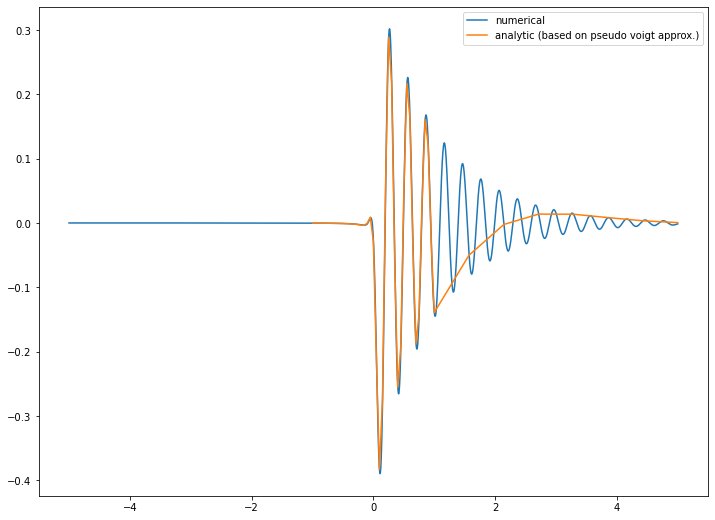

In [24]:
# Compare two implementation

plt.plot(t, dmp_osc_conv_voigt_num, label='numerical')
plt.plot(t_sample, dmp_osc_conv_pvoigt_anal, label='analytic (based on pseudo voigt approx.)')
plt.legend()
plt.show()

Analytic implementation well approximates convolution of exponential decay function and voigt instrumental response function.

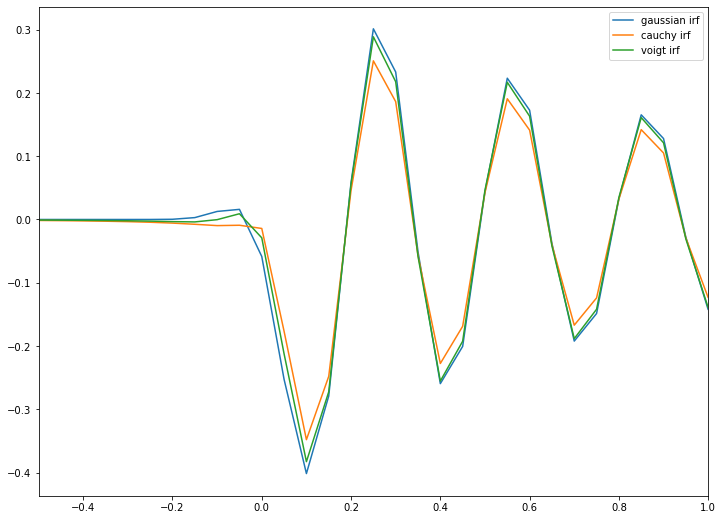

In [25]:
plt.plot(t_sample, dmp_osc_conv_gau_anal, label='gaussian irf')
plt.plot(t_sample, dmp_osc_conv_cauchy_anal, label='cauchy irf')
plt.plot(t_sample, dmp_osc_conv_pvoigt_anal, label='voigt irf')
plt.legend()
plt.xlim(-0.5, 1)
plt.show()

## Determine instrumental response function depending detection limits for osciilation period

Use gaussian instrumental response function

In [26]:
fwhm = 0.15; tau = 1
period = [fwhm/20, fwhm/10, fwhm/5, fwhm/2, fwhm, 2*fwhm, 5*fwhm, 10*fwhm, 20*fwhm]
t_sample = np.linspace(-1, 1, 2001)
noise = np.random.normal(0, 1/10, t_sample.size) # define noise
model = np.empty((t_sample.size, 9))

In [27]:
# compute model
for i in range(9):
    model[:, i] = dmp_osc_conv_gau(t_sample, fwhm, 1/tau, period[i], phase)

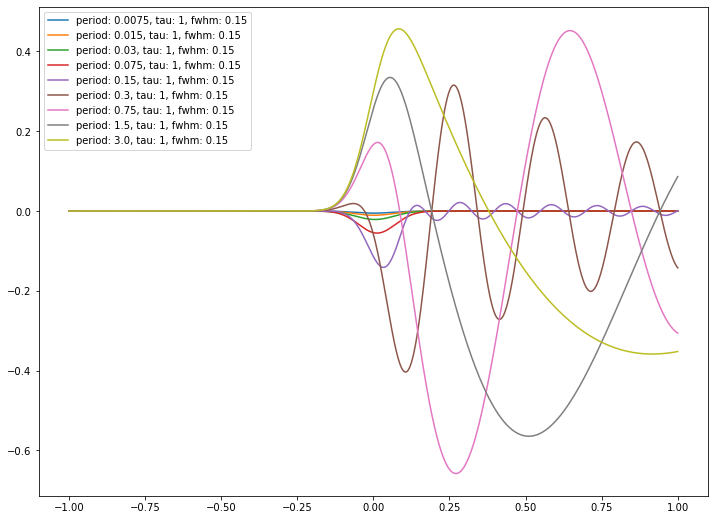

In [28]:
# plot model
for i in range(9):
    plt.plot(t_sample, model[:, i], label=f'period: {period[i]}, tau: {tau}, fwhm: {fwhm}')
plt.legend()
plt.show()

Due to the broadening feature of gaussian instrumental response function, we cannot detect exponential decay feature with lifetime less than full width at half maximum of irf function.